In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [17]:
tick_size = 14

plt.rc('xtick', labelsize=tick_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=tick_size)    # fontsize of the tick labels
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=tick_size)

In [18]:
def free_cont_1d(omega):
    result = 1/np.sqrt(omega)
    bool_arr = omega <= 0
    result[bool_arr] = 0
    return result

def sommerfeld_enh_1d(omega):
    return np.tanh(omega)

def free_cont(omega):
    result = np.sqrt(omega)
    bool_arr = omega < 0
    result[bool_arr] = 0
    return result

def sommerfeld_enh(omega):
    pi_omega = np.pi/np.sqrt(omega)
    result = pi_omega * np.exp(pi_omega)/np.sinh(pi_omega)
    
    bool_arr = omega <= 0.0
    result[bool_arr] = 0
    return result

def gauss(omega):
    result = np.exp(-(omega)**2/0.1)
    result[omega > 0] = 0
    return result

def gauss_ul(omega, upper, lower):
    result = upper*np.exp(-(omega)**2/0.1)
    result[omega > 0] = lower*np.exp(-(omega[omega>0])**2/0.1)
    return result

In [26]:
omega = np.linspace(-5, 15, 1000)
offset = np.linspace(-2, 15, 1000)
#offset[omega < 0] = 0
#offset[omega >= 0] = -6.4

C:\Users\elorm\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
C:\Users\elorm\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


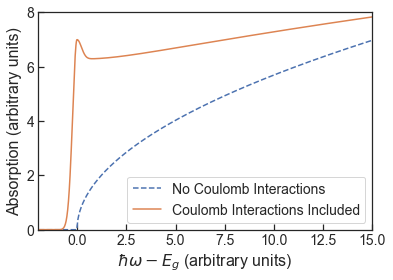

In [31]:
plt.plot(omega, 1.8*free_cont(omega), "--", label="No Coulomb Interactions")
plt.plot(omega, free_cont(omega)*sommerfeld_enh(omega) + gauss_ul(omega, 7,0.71), label="Coulomb Interactions Included")
plt.xlabel("$\hbar\omega - E_{g}$ (arbitrary units)")
plt.ylabel("Absorption (arbitrary units)")
plt.xlim([-2, 15])

plt.ylim([0,8])
plt.legend()
plt.savefig("coulomb_enhancement_3d.pdf")

C:\Users\elorm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


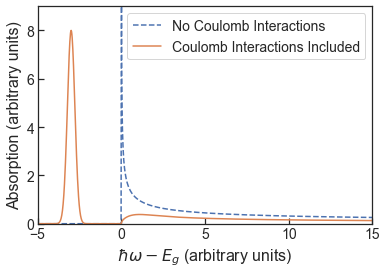

In [27]:
plt.plot(omega, free_cont_1d(omega), "--", label = "No Coulomb Interactions")
plt.plot(omega, 0.5*free_cont_1d(omega)*sommerfeld_enh_1d(omega) + gauss_ul(omega+3, 8,8), label="Coulomb Interactions Included")
plt.xlabel("$\hbar\omega - E_{g}$ (arbitrary units)")
plt.ylabel("Absorption (arbitrary units)")
plt.ylim([0,9])
plt.xlim([-5, 15])
plt.legend()

plt.savefig("coulomb_enhancement_1d.pdf")

In [22]:
omega > 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

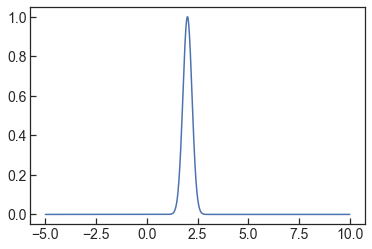

In [23]:
plt.plot(omega, np.exp( -(omega-2)**2 /0.1 ))

In [24]:
sommerfeld_enh(0)

C:\Users\elorm\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\elorm\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


TypeError: 'numpy.float64' object does not support item assignment

In [ ]:
np.clip(omega, 0.1, np.max(omega))

In [ ]:
sommerfeld_enh(np.clip(omega, 0.1, np.max(omega)))

In [ ]:
free_cont(-2)

In [ ]:
sommerfeld_enh(0)

In [ ]:
plt.plot(omega, 1/omega)